In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import matplotlib as mpl

In [37]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [39]:
lineal0 = lambda x,a : a*x

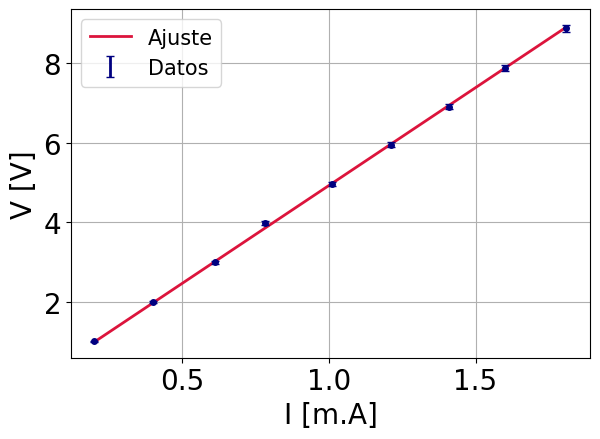

In [85]:
df1 = pd.read_csv('Ohm1.csv',skiprows=1,names=['V','err_V','I','err_I','last V','last I'])
df1['err_V'] = 0.01*df1['V']
df1['err_I'] = 0.01*df1['I']

pars1,cov1 = cf(lineal0,df1['I'],df1['V'])
a1 = pars1[0]
x_adj1 = np.linspace(min(df1['I']),max(df1['I']),100)
y_adj1 = lineal0(x_adj1,a1)

plt.scatter(df1['I'],df1['V'],c='navy',zorder=3)
plt.errorbar(df1['I'],df1['V'],yerr=df1['err_V'],fmt='None',ecolor='Navy',zorder=2,label='Datos')
plt.plot(x_adj1,y_adj1,'crimson',zorder=1,label='Ajuste')
plt.grid(zorder=0)
plt.xlabel('I [m.A]')
plt.ylabel('V [V]')
plt.legend(fontsize=15)
plt.savefig('ohm1.pdf')

1.0403385550865083


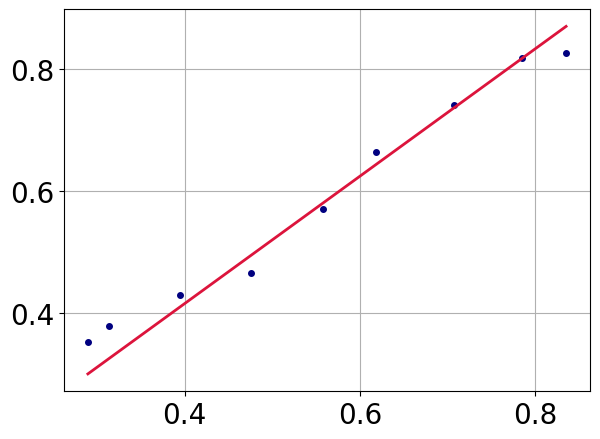

In [86]:
df2 = pd.read_csv('caru.csv')
R_2=4.924732568019612
R=R_2/(df2['R1']+R_2)
plt.scatter(R,df2['v2'],c='navy')
pars2,cov2 = cf(lineal0,R,df2['v2'])
a2 = pars2[0]
x_adj2 = np.linspace(min(R),max(R),100)
y_adj2 = lineal0(x_adj2,a2)

#plt.scatter(df2['I'],df2['V'],c='navy',zorder=2,label='datos')
plt.plot(x_adj2,y_adj2,'crimson',zorder=1,label='ajuste')
plt.grid(zorder=0)
#plt.xlabel('I [mA]')
#plt.ylabel('V [V]')
#plt.legend()
print(a2)